### CITS5508 labsheet 5

**Author: Thanh Duy Tang**<br>
**Student ID: 22803018**<br>
**Date: May 2020**

# **1. Loading data**

In [0]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import pickle
import tensorflow as tf
from tensorflow import keras

# import other packages needed for the project below this line

In [4]:
# IMPOTRTANT: set the path where the data files are relative to the Notebook file. 
# You can change the variable pathname below to anything that suits you, For example,
# if your Notebook file is to be run on Google Colab, then you will need to set up
# this variable properly, e.g., 
#       pathname = os.path.join('My Drive', 'CITS5508').
#
# Before submitting your Notebook file to cssubmit, ensure that you change
# this variable back to '.'
pathname = 'gdrive/My Drive/CITS5508'
from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('gdrive/My Drive/CITS5508')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['test_batch',
 'data_batch_3',
 'data_batch_2',
 'data_batch_5',
 'data_batch_1',
 'data_batch_4',
 'batches.meta',
 'lab05.ipynb']

In [0]:
# function for loading the data_batch_file
def load_pickle_file(filename, path='.'):
    '''
    This function reads the given pickle file and returns a dictionary object.
    '''
    with open(os.path.join(path,filename), 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict  


def load_training(filename_prefix, N_batches, path='.', height=32, width=32, Nchannels=3):
    '''
    This function reads the 5 data batches and returns the X_train and y_train numpy arrays.
    To save memory space, X_train is set to 'float32' (single precision floating point numbers).
    If this causes an issue, it can be set to 'float64'. y_train is set to uint8. This is
    the same data type as used in the MNIST dataset, so it should be fine.
    '''
    batch_no = range(1,N_batches+1)  # the batch numbers start at 1
    # Read in the data_batch_ files
    batches = [load_pickle_file(filename_prefix+str(b), path=path) for b in batch_no]

    # variable batches is a list containing 5 elements, each of which is a dictionary object

    # compose our X_train and y_train
    # according to the download site, the training set should have 50,000 instances. We caldulate
    # the length from the dictionary that we read in anyway.
    batch_sizes = [len(batches[i][b'labels']) for i in range(N_batches)]
    train_set_size = np.sum(batch_sizes)
    
    X_train = np.zeros((train_set_size, width, height, Nchannels), dtype='float32')
    y_train = np.zeros(train_set_size).astype('uint8')
    loc = 0
    for i in range(N_batches):
        X_train[loc:(loc+batch_sizes[i]),:,:,:] = np.rollaxis(
            np.reshape(batches[i][b'data'], (-1,Nchannels,height,width)), 1, 4) / 255.0
        y_train[loc:(loc+batch_sizes[i])] = batches[i][b'labels']
        loc += batch_sizes[i]
    return X_train, y_train


def load_testing(filename, path='.', height=32, width=32, Nchannels=3):
    '''
    This function reads the test_batch and returns X_test and y_test.
    To save memory space, X_test is set to 'float32' (single precision floating point numbers).
    If this causes an issue, it can be set to 'float64'. y_test is set to uint8. This is
    the same data type as used in the MNIST dataset, so it should be fine.
    '''
    # now read test_batch and construct the test set
    test_dict = load_pickle_file(filename, path=path)
    
    X_test = np.rollaxis(np.reshape(test_dict[b'data'], (-1,Nchannels,height,width)), 1, 4) / 255.0
    X_test = X_test.astype('float32')
    y_test = np.array(test_dict[b'labels'], dtype='uint8')
    return X_test, y_test

In [6]:
# According to the download site, the training set is split into five batches stored in 5 files,
# each colour image has dimension equal to 32 x 32 x 3, and there are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

N_batches = 5  
train_filename_prefix = 'data_batch_'
test_filename = 'test_batch'

X_train, y_train = load_training(train_filename_prefix, N_batches, path=pathname)
X_test, y_test = load_testing(test_filename, path=pathname)

train_set_size = X_train.shape[0]
test_set_size = X_test.shape[0]
print('Number of training instances:', train_set_size)
print('Number of test instances:    ', test_set_size)

Number of training instances: 50000
Number of test instances:     10000


The first 20 instances of the CIFAR-10 training set


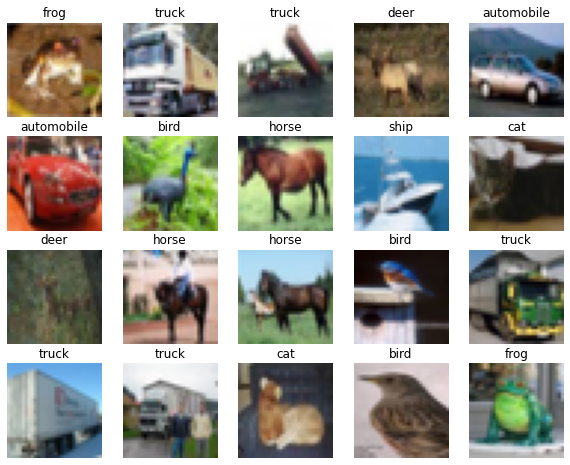

In [7]:
# display some of the images to ensure that we have read in the data correctly
print('The first 20 instances of the CIFAR-10 training set')
plt.figure(figsize=(10, 8))
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    ax.set_title(class_names[y_train[i]])
plt.show()


The first 20 instances of the CIFAR-10 test set


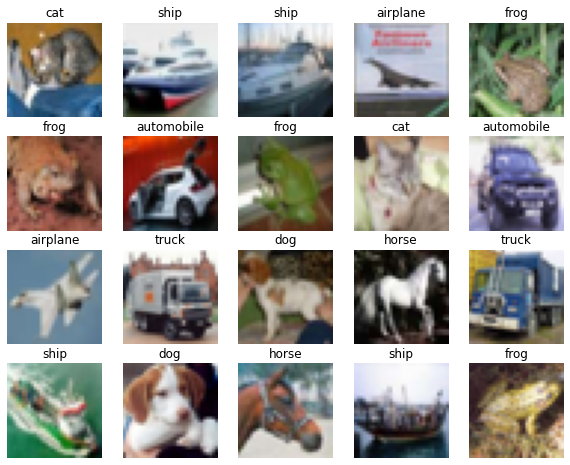

In [8]:
# display some instances in the test set
print('The first 20 instances of the CIFAR-10 test set')
plt.figure(figsize=(10, 8))
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    ax.set_title(class_names[y_test[i]])
plt.show()

In [9]:
# X_train, y_train, X_test, and y_test are all numpy arrays
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_train.shape = (50000, 32, 32, 3) data type: float32
y_train.shape = (50000,) data type: uint8
X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


# **2. Preparing data**

In [0]:
#Split full training set into a validation set and smaller training set.
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test

# **3. Multilayer Perceptron**

### **3.1. Baseline**



```
#Creating the model.
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#Summary of Model
model.summary()
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
=================================================================
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0


#Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])

#Train and evaluate the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8987 - accuracy: 0.3159 - val_loss: 1.7802 - val_accuracy: 0.3608
Epoch 2/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7156 - accuracy: 0.3899 - val_loss: 1.6539 - val_accuracy: 0.4000
Epoch 3/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6343 - accuracy: 0.4180 - val_loss: 1.6030 - val_accuracy: 0.4230
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5807 - accuracy: 0.4400 - val_loss: 1.5977 - val_accuracy: 0.4236
Epoch 5/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5333 - accuracy: 0.4570 - val_loss: 1.5417 - val_accuracy: 0.4446
Epoch 6/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5006 - accuracy: 0.4671 - val_loss: 1.5077 - val_accuracy: 0.4632
Epoch 7/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4702 - accuracy: 0.4780 - val_loss: 1.5002 - val_accuracy: 0.4636
Epoch 8/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4410 - accuracy: 0.4896 - val_loss: 1.4768 - val_accuracy: 0.4718
Epoch 9/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4174 - accuracy: 0.4982 - val_loss: 1.4600 - val_accuracy: 0.4758
Epoch 10/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3998 - accuracy: 0.5064 - val_loss: 1.4973 - val_accuracy: 0.4622

```


With this model, we can get 50.64% (increasing for each epoch) for training accuracy and 46.22%(fluctuating for each epoch but the trend seems to increase) for validation accuracy at epoch 10. Moreover, the loss tends to decrease for each epoch. 

## **3.2. Initialze = "he_normal"**



```
#Creating the model.
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])

#Compiling the model
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])


#Train and evaluate the model
history1 = model1.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
                    
Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8957 - accuracy: 0.3206 - val_loss: 1.8133 - val_accuracy: 0.3414
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7135 - accuracy: 0.3905 - val_loss: 1.6398 - val_accuracy: 0.4040
Epoch 3/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6238 - accuracy: 0.4234 - val_loss: 1.6188 - val_accuracy: 0.4138
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5684 - accuracy: 0.4411 - val_loss: 1.6089 - val_accuracy: 0.4300
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5204 - accuracy: 0.4610 - val_loss: 1.5823 - val_accuracy: 0.4368
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4886 - accuracy: 0.4719 - val_loss: 1.5001 - val_accuracy: 0.4648
Epoch 7/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4597 - accuracy: 0.4799 - val_loss: 1.5157 - val_accuracy: 0.4510
Epoch 8/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4275 - accuracy: 0.4943 - val_loss: 1.4824 - val_accuracy: 0.4734
Epoch 9/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4052 - accuracy: 0.5012 - val_loss: 1.4572 - val_accuracy: 0.4914
Epoch 10/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3865 - accuracy: 0.5072 - val_loss: 1.4270 - val_accuracy: 0.4920
```



With this model, we can get 50.72% (increasing for each epoch) for training accuracy and 49.20%(fluctuating for each epoch but the trend seems to increase and be higer than model) for validation accuracy at epoch 10. Moreover, the loss for both sets tends to decrease for each epoch.

## **3.3. Use VarianceScale Initializer with fanavg**



```
#Creating the model.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu", kernel_initializer=init),
    keras.layers.Dense(100, activation="relu", kernel_initializer=init),
    keras.layers.Dense(10, activation="softmax")
])

#Compiling the model
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])


#Train and evaluate the model
history2 = model2.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9019 - accuracy: 0.3203 - val_loss: 1.8070 - val_accuracy: 0.3668
Epoch 2/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7149 - accuracy: 0.3912 - val_loss: 1.6562 - val_accuracy: 0.4056
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6348 - accuracy: 0.4222 - val_loss: 1.5813 - val_accuracy: 0.4370
Epoch 4/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5804 - accuracy: 0.4399 - val_loss: 1.6062 - val_accuracy: 0.4336
Epoch 5/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5296 - accuracy: 0.4570 - val_loss: 1.5503 - val_accuracy: 0.4524
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5009 - accuracy: 0.4696 - val_loss: 1.5344 - val_accuracy: 0.4536
Epoch 7/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4700 - accuracy: 0.4778 - val_loss: 1.4909 - val_accuracy: 0.4636
Epoch 8/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4368 - accuracy: 0.4888 - val_loss: 1.4923 - val_accuracy: 0.4724
Epoch 9/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4147 - accuracy: 0.5001 - val_loss: 1.4780 - val_accuracy: 0.4774
Epoch 10/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3955 - accuracy: 0.5088 - val_loss: 1.4732 - val_accuracy: 0.4736

```



With this model, we can get 50.88% (increasing for each epoch) for training accuracy and 47.36%(fluctuating for each epoch but the trend seems to increase and be lower than model above) for validation accuracy at epoch 10. Moreover, the loss for both sets tends to decrease for each epoch.

## **3.4. Power Scheduling**



```
#Creating the model.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#Compiling the model
model3.compile(loss="sparse_categorical_crossentropy",
               metrics=["accuracy"], 
               optimizer = optimizer)


#Train and evaluate the model
history3 = model3.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8965 - accuracy: 0.3182 - val_loss: 1.8420 - val_accuracy: 0.3230
Epoch 2/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7148 - accuracy: 0.3925 - val_loss: 1.8097 - val_accuracy: 0.3378
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6363 - accuracy: 0.4239 - val_loss: 1.7579 - val_accuracy: 0.3532
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5826 - accuracy: 0.4406 - val_loss: 1.7379 - val_accuracy: 0.3942
Epoch 5/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5427 - accuracy: 0.4560 - val_loss: 1.6153 - val_accuracy: 0.4236
Epoch 6/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5077 - accuracy: 0.4700 - val_loss: 1.5773 - val_accuracy: 0.4410
Epoch 7/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4765 - accuracy: 0.4808 - val_loss: 1.5634 - val_accuracy: 0.4370
Epoch 8/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4499 - accuracy: 0.4924 - val_loss: 1.4980 - val_accuracy: 0.4702
Epoch 9/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4271 - accuracy: 0.4965 - val_loss: 1.4919 - val_accuracy: 0.4784
Epoch 10/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4044 - accuracy: 0.5058 - val_loss: 1.5709 - val_accuracy: 0.4376

```



With this model, we can get 50.58% (increasing for each epoch) for training accuracy and 43.76%(fluctuating for each epoch but the trend seems to increase and be the lowest) for validation accuracy at epoch 10. Moreover, the loss for both sets tends to decrease for each epoch.

## **3.5. Exponential Scheduling**



```
#Define function exponential_decay_fn
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)


#Define function exponential_decay with function exponential_decay_fn inside
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)


#Creating the model.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])



#Compiling the model
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])


#Train and evaluate model
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history4 = model4.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])


Epoch 1/10
1407/1407 [==============================] - 13s 9ms/step - loss: 2.1451 - accuracy: 0.2705 - val_loss: 1.8883 - val_accuracy: 0.3208 - lr: 0.0100
Epoch 2/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7882 - accuracy: 0.3567 - val_loss: 1.7665 - val_accuracy: 0.3586 - lr: 0.0089
Epoch 3/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6744 - accuracy: 0.3990 - val_loss: 1.6429 - val_accuracy: 0.4078 - lr: 0.0079
Epoch 4/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6204 - accuracy: 0.4186 - val_loss: 1.6713 - val_accuracy: 0.4098 - lr: 0.0071
Epoch 5/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5710 - accuracy: 0.4367 - val_loss: 1.6265 - val_accuracy: 0.4176 - lr: 0.0063
Epoch 6/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5303 - accuracy: 0.4522 - val_loss: 1.5906 - val_accuracy: 0.4316 - lr: 0.0056
Epoch 7/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4997 - accuracy: 0.4658 - val_loss: 1.5590 - val_accuracy: 0.4246 - lr: 0.0050
Epoch 8/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4727 - accuracy: 0.4743 - val_loss: 1.5276 - val_accuracy: 0.4496 - lr: 0.0045
Epoch 9/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4494 - accuracy: 0.4830 - val_loss: 1.5072 - val_accuracy: 0.4670 - lr: 0.0040
Epoch 10/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4261 - accuracy: 0.4924 - val_loss: 1.5245 - val_accuracy: 0.4554 - lr: 0.0035
```



With this model, we can get 49.24% (increasing for each epoch and to be lower than models above) for training accuracy and 45.54%(fluctuating for each epoch but the trend seems to increase and higer than model3) for validation accuracy at epoch 10. Moreover, the loss for both sets tends to decrease for each epoch.

## **3.6. Early Stop monitor='val_loss', patience=10, verbose=2, min_delta = 0**



```
#Creating the model.
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#Compiling the model
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])


#Train and evaluate the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=2, min_delta = 0)]
history5 = model5.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks = callbacks)



Epoch 1/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8998 - accuracy: 0.3208 - val_loss: 1.7426 - val_accuracy: 0.3726
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7045 - accuracy: 0.3938 - val_loss: 1.6410 - val_accuracy: 0.4108
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6306 - accuracy: 0.4220 - val_loss: 1.6183 - val_accuracy: 0.4240
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5741 - accuracy: 0.4421 - val_loss: 1.5890 - val_accuracy: 0.4290
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5339 - accuracy: 0.4576 - val_loss: 1.5364 - val_accuracy: 0.4598
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5011 - accuracy: 0.4674 - val_loss: 1.5458 - val_accuracy: 0.4454
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4716 - accuracy: 0.4795 - val_loss: 1.4994 - val_accuracy: 0.4650
Epoch 8/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4457 - accuracy: 0.4852 - val_loss: 1.4738 - val_accuracy: 0.4748
Epoch 9/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4190 - accuracy: 0.4936 - val_loss: 1.5210 - val_accuracy: 0.4602
Epoch 10/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3948 - accuracy: 0.5058 - val_loss: 1.4997 - val_accuracy: 0.4728
```



With this model, we can get 50.58% (increasing for each epoch) for training accuracy and 47.28%(fluctuating for each epoch but the trend seems to increase and to be the highest one) for validation accuracy at epoch 10. Moreover, the loss for both sets tends to decrease for each epoch.

## **2.7. Early Stop monitor='loss', mode='max', min_delta = 1, verbose=1, patience=10**



```
#Creating the model.
model6 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#Compiling the model
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])

#Train and evaluate the model
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='max', min_delta = 1, verbose=1, patience=10)
history6 = model6.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks = callbacks)

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8882 - accuracy: 0.3217 - val_loss: 1.7921 - val_accuracy: 0.3592
Epoch 2/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6969 - accuracy: 0.3982 - val_loss: 1.6293 - val_accuracy: 0.4130
Epoch 3/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6135 - accuracy: 0.4262 - val_loss: 1.5796 - val_accuracy: 0.4370
Epoch 4/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5614 - accuracy: 0.4434 - val_loss: 1.5781 - val_accuracy: 0.4390
Epoch 5/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5170 - accuracy: 0.4599 - val_loss: 1.5498 - val_accuracy: 0.4456
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4862 - accuracy: 0.4739 - val_loss: 1.5016 - val_accuracy: 0.4640
Epoch 7/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4571 - accuracy: 0.4824 - val_loss: 1.4880 - val_accuracy: 0.4690
Epoch 8/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4278 - accuracy: 0.4921 - val_loss: 1.4791 - val_accuracy: 0.4668
Epoch 9/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4067 - accuracy: 0.5034 - val_loss: 1.4625 - val_accuracy: 0.4838
Epoch 10/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.3887 - accuracy: 0.5077 - val_loss: 1.4746 - val_accuracy: 0.4704
```



With this model, we can get 50.77% (increasing for each epoch) for training accuracy and 47.04%(fluctuating for each epoch but the trend seems to increase and to be the second highest one) for validation accuracy at epoch 10. Moreover, the loss for both sets tends to decrease for each epoch.

## **2.8. Optimal parameter settings**

In [0]:
# Creating the model.
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
 
# Compiling the model
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adamax",
              metrics=["accuracy"])
 
 
# Train and evaluate the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=2, min_delta = 0)]
history5 = model5.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks = callbacks)

Epoch 1/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8962 - accuracy: 0.3242 - val_loss: 1.7486 - val_accuracy: 0.3692
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7018 - accuracy: 0.3957 - val_loss: 1.6254 - val_accuracy: 0.4246
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6212 - accuracy: 0.4237 - val_loss: 1.6424 - val_accuracy: 0.4180
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5595 - accuracy: 0.4486 - val_loss: 1.5500 - val_accuracy: 0.4448
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5191 - accuracy: 0.4601 - val_loss: 1.5230 - val_accuracy: 0.4604
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4851 - accuracy: 0.4760 - val_loss: 1.5026 - val_accuracy: 0.4726
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4505 - accuracy: 0.4856 - val_loss: 1.5285 - val_accuracy:

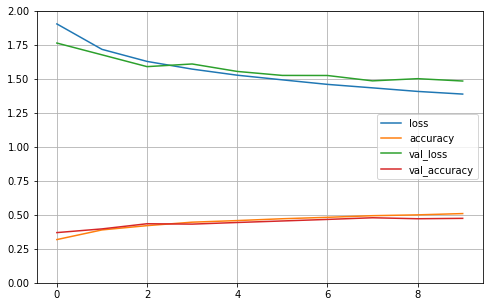

In [0]:
#Plot the results of history5
import pandas as pd

pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.0)
plt.show()

The optimal parameter settings that helps the model get the higher accuracy both validation and training set, and also the loss of both training and validation set are lower compared to others parameter above. The aforementioned model is model 5 which gets the accuracy to be 51.76% and the validation accuracy to be 47.46%. I will use that model to predict the test set.

In [0]:
#Evaluate the model with test set
model5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4412 - accuracy: 0.4856


[1.441223382949829, 0.48559999465942383]

## **2.9. Confusion Matrix** 

The accuracy for test set is 48.56% which is lower than training set. and the loss of test set is about 1.4412

In [0]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model5.predict_classes(X_test)
confusion_matrix(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[630,  45,  20,  29,  10,  18,  17,  46,  85, 100],
       [ 49, 559,   5,  30,   5,  14,  14,  28,  52, 244],
       [134,  33, 191, 145,  81,  92, 126, 136,  22,  40],
       [ 64,  23,  40, 396,  18, 180,  90,  87,  21,  81],
       [ 91,  17,  77, 111, 280,  53, 141, 175,  22,  33],
       [ 56,  16,  36, 257,  31, 343,  58, 129,  29,  45],
       [ 15,  18,  35, 157,  59,  71, 543,  40,  20,  42],
       [ 54,  21,  14,  84,  33,  57,  18, 618,  10,  91],
       [190,  76,   5,  34,   5,  19,   8,  23, 534, 106],
       [ 45, 119,   2,  30,   4,  23,  18,  45,  35, 679]])

Here are some comments about the confusion matrix:
- 630 values were correctly classified as "airplane". 
- 559 values were correctly classified as "automobile".
- 191 values were correctly classified as "bird".
- 396 values were correctly classified as "cat".
- 280 values were correctly classified as "deer".
- 343 values were correctly classified as "dog". 
- 543 values were correctly classified as "frog".
- 618 values were correctly classified as "horse".
- 534 values were correctly classified as "ship".
- 679 values were correctly classified as "truck".
- Read down to the "airplane" row, 370 values should have been "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix that were classified as "airplane".
- For the "automobile" row, there are 441 values that should have been  "airplane", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix but they were classified as "automobile".
- 809 values from "bird" row were classified as "bird", but they must have been in "airplane", "automobile", "cat", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- There are 604 values that were classfied as "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- 720 values was classified as "deer" in "deer" row, but they must have been "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "cat", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- 657 values from "dog" row were classified as "dog", but they must have been in "airplane", "automobile", "bird", "cat", "deer", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- There are 457 values that were classfied as "frog" in "frog" row. They must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "horse", "ship", "truck" respectively as the confusion matrix.
- 482 value was classified as "horse" in "horse" row, but they must have been "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "ship", "truck" respectively as the confusion matrix.
- 466 values was classified as "ship" in "ship" row, but they must have been "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "truck" respectively as the confusion matrix.
- 321 values from "truck" row were classified as "truck", but they must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship" respectively as the confusion matrix.

## **2.10. Illustrate the correct images**

In [0]:
#Probability to get the 3 correct classifications.
X_new = X_test[7:10]
y_proba = model5.predict(X_new)
y_proba.round(2)

array([[0.02, 0.  , 0.16, 0.12, 0.2 , 0.07, 0.36, 0.06, 0.01, 0.  ],
       [0.07, 0.01, 0.21, 0.24, 0.14, 0.23, 0.02, 0.07, 0.01, 0.  ],
       [0.04, 0.64, 0.01, 0.01, 0.  , 0.  , 0.  , 0.02, 0.07, 0.21]],
      dtype=float32)

In [0]:
#Model prediction for X_new
y_pred = model5.predict_classes(X_new)
y_pred

array([6, 3, 1])

In [0]:
#Names that the model classified
np.array(class_names)[y_pred]

array(['frog', 'cat', 'automobile'], dtype='<U10')

In [0]:
#Names that classified correctly of test set.
y_new = y_test[7:10]
y_new

array([6, 3, 1], dtype=uint8)

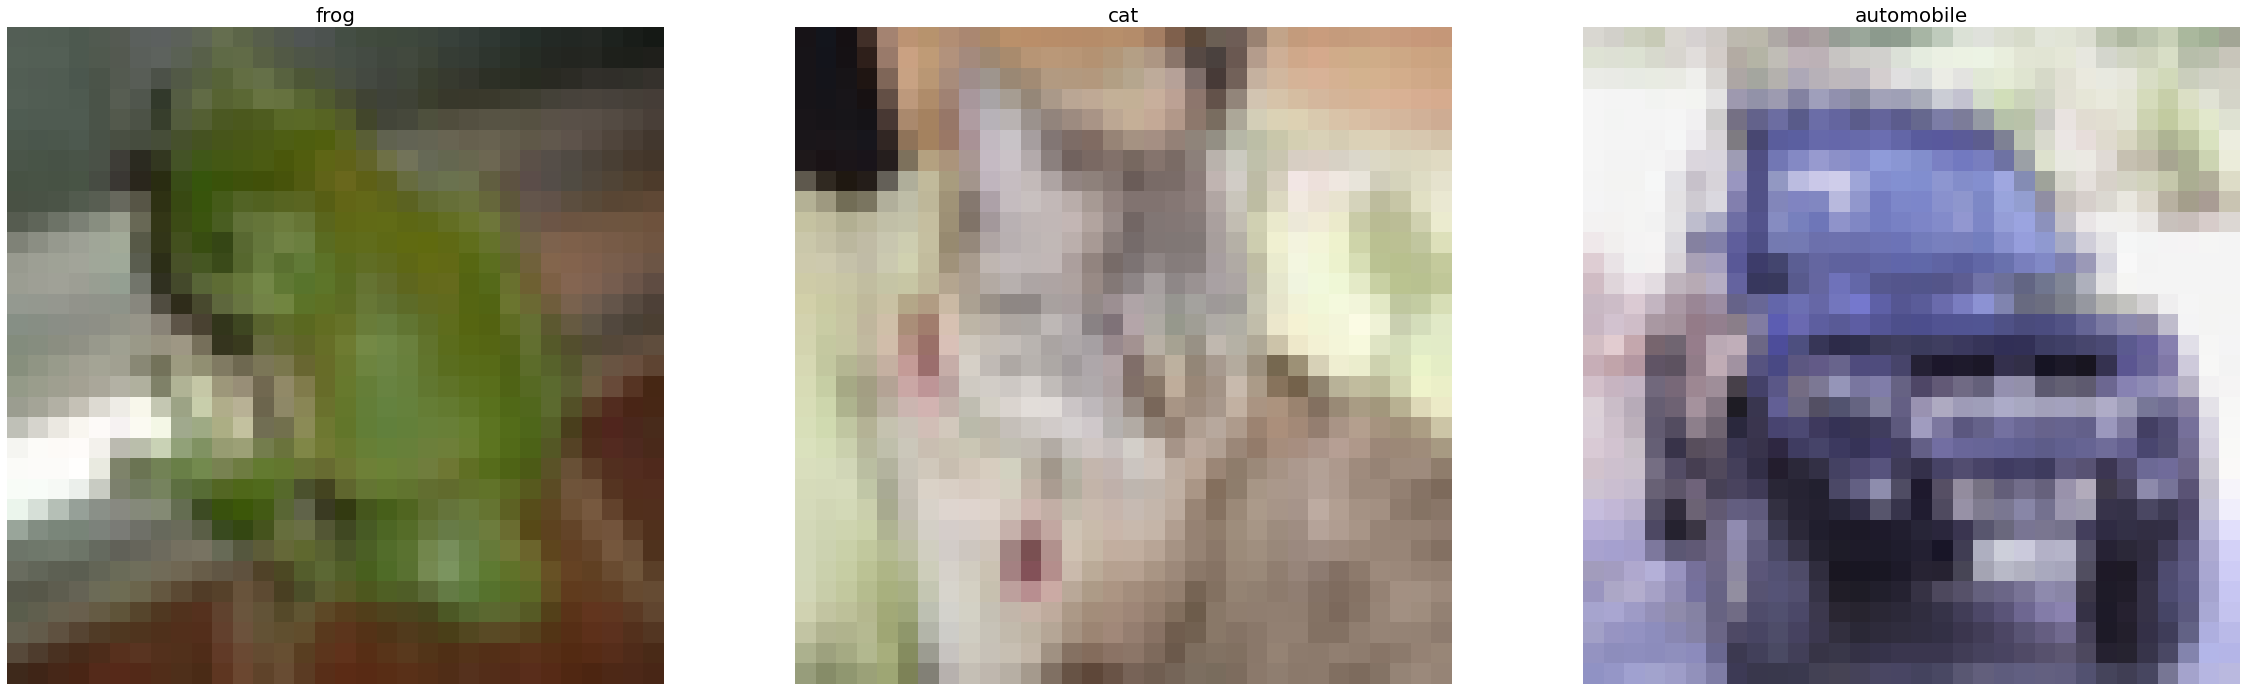

In [0]:
#Plot the pictures that the model classified correctly.
plt.figure(figsize=(40, 20))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The model correctly classified "frog" and "cat" and "automobile" in these pictures

## **2.11. Illustrate the incorrect images**

In [0]:
#Probability to get the 3 incorrect classifications.
X_new = X_test[35:38]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.01, 0.5 , 0.01, 0.03, 0.  , 0.01, 0.04, 0.  , 0.29, 0.1 ],
       [0.  , 0.  , 0.01, 0.01, 0.94, 0.01, 0.  , 0.02, 0.  , 0.  ],
       [0.04, 0.55, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.41]],
      dtype=float32)

In [0]:
#Model prediction for X_new
y_pred = model5.predict_classes(X_new)
y_pred

array([1, 6, 9])

In [0]:
#Names that the model classified
np.array(class_names)[y_pred]

array(['automobile', 'frog', 'truck'], dtype='<U10')

In [0]:
#Names that classified correctly of test set.
y_new = y_test[35:38]
y_new

array([2, 4, 1], dtype=uint8)

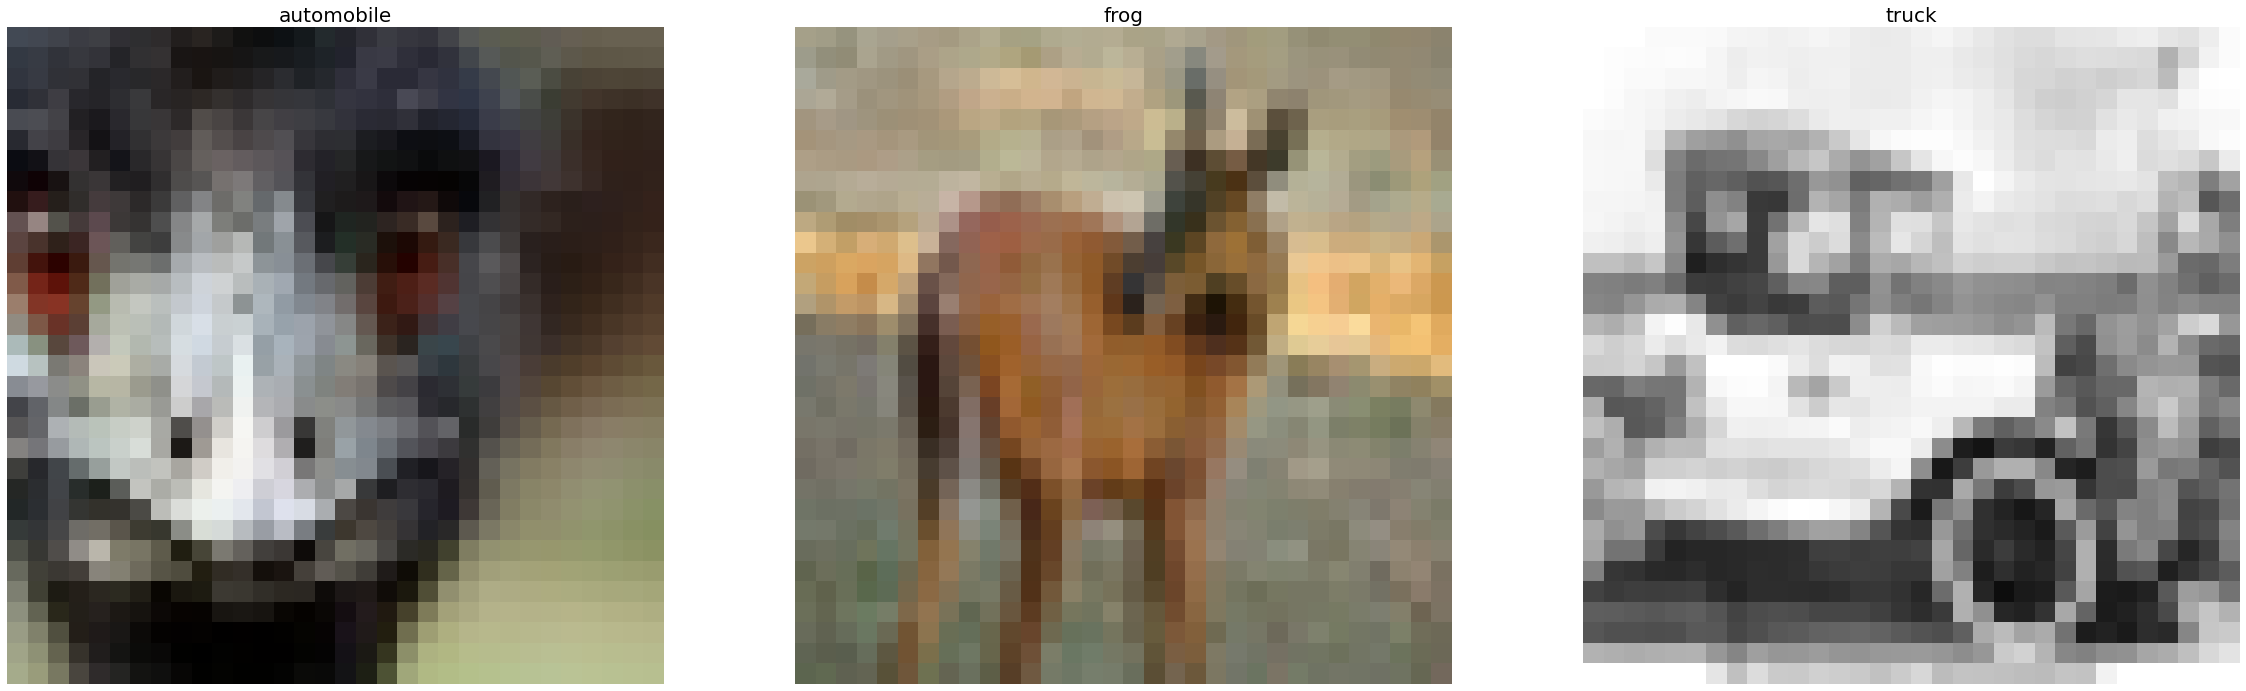

In [0]:
#Plot the pictures that the model classified correctly.
plt.figure(figsize=(40, 20))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The first picture is actually a "bird" but the model classified it as "automobile". The second picture is a "horse" but the model classified as "frog". The third picture is an "automobile" but once again the model classified it as "truck".

# **4. Convolutional Neural Networks**

## **4.1 Baseline**



```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 148us/step - loss: 1.7800 - accuracy: 0.3561 - val_loss: 1.6108 - val_accuracy: 0.4160
Epoch 2/10
45000/45000 [==============================] - 6s 144us/step - loss: 1.4658 - accuracy: 0.4736 - val_loss: 1.3630 - val_accuracy: 0.5180
Epoch 3/10
45000/45000 [==============================] - 6s 144us/step - loss: 1.3230 - accuracy: 0.5274 - val_loss: 1.2588 - val_accuracy: 0.5634
Epoch 4/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.2225 - accuracy: 0.5668 - val_loss: 1.1955 - val_accuracy: 0.5804
Epoch 5/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.1436 - accuracy: 0.5975 - val_loss: 1.1465 - val_accuracy: 0.6010
Epoch 6/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.0857 - accuracy: 0.6181 - val_loss: 1.0803 - val_accuracy: 0.6254
Epoch 7/10
45000/45000 [==============================] - 6s 143us/step - loss: 1.0332 - accuracy: 0.6378 - val_loss: 1.0452 - val_accuracy: 0.6400
Epoch 8/10
45000/45000 [==============================] - 6s 141us/step - loss: 0.9928 - accuracy: 0.6525 - val_loss: 1.0371 - val_accuracy: 0.6344
Epoch 9/10
45000/45000 [==============================] - 6s 143us/step - loss: 0.9505 - accuracy: 0.6706 - val_loss: 0.9958 - val_accuracy: 0.6570
Epoch 10/10
45000/45000 [==============================] - 6s 139us/step - loss: 0.9152 - accuracy: 0.6793 - val_loss: 0.9817 - val_accuracy: 0.6566




#Evaluate test set
model.evaluate(X_test, y_test)


10000/10000 [==============================] - 1s 92us/step
[1.002580987071991, 0.6464999914169312]
```



With random settings, the accuracy of training set and test set are 67.93% and 64.65% respectively.

## **5.2 Kernel_size = 7**



```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (7,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (7, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.7626 - accuracy: 0.3612 - val_loss: 1.5246 - val_accuracy: 0.4652
Epoch 2/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.4517 - accuracy: 0.4777 - val_loss: 1.3459 - val_accuracy: 0.5224
Epoch 3/10
45000/45000 [==============================] - 6s 138us/step - loss: 1.3151 - accuracy: 0.5294 - val_loss: 1.2342 - val_accuracy: 0.5666
Epoch 4/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.2120 - accuracy: 0.5710 - val_loss: 1.1548 - val_accuracy: 0.5914
Epoch 5/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.1264 - accuracy: 0.5987 - val_loss: 1.2257 - val_accuracy: 0.5730
Epoch 6/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.0640 - accuracy: 0.6255 - val_loss: 1.0986 - val_accuracy: 0.6132
Epoch 7/10
45000/45000 [==============================] - 6s 139us/step - loss: 1.0113 - accuracy: 0.6417 - val_loss: 1.0360 - val_accuracy: 0.6420
Epoch 8/10
45000/45000 [==============================] - 6s 139us/step - loss: 0.9613 - accuracy: 0.6610 - val_loss: 1.0087 - val_accuracy: 0.6470
Epoch 9/10
45000/45000 [==============================] - 6s 140us/step - loss: 0.9206 - accuracy: 0.6743 - val_loss: 0.9731 - val_accuracy: 0.6642
Epoch 10/10
45000/45000 [==============================] - 7s 147us/step - loss: 0.8799 - accuracy: 0.6893 - val_loss: 0.9548 - val_accuracy: 0.6734


#Evaluate test set
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 103us/step
[0.9782518960952759, 0.6650000214576721]

```



When I set kernel size of 2 convolutional layers = 7, the accuracy of both set which are about 68.93% and 66.50% respectively tended to increase compared to the baseline result.

# **5.3 Kernel_size = 2**



```
#Building the model
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (2,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (2, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 153us/step - loss: 1.7991 - accuracy: 0.3522 - val_loss: 1.5216 - val_accuracy: 0.4572
Epoch 2/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.4513 - accuracy: 0.4764 - val_loss: 1.3434 - val_accuracy: 0.5264
Epoch 3/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.3195 - accuracy: 0.5270 - val_loss: 1.2593 - val_accuracy: 0.5532
Epoch 4/10
45000/45000 [==============================] - 6s 144us/step - loss: 1.2288 - accuracy: 0.5622 - val_loss: 1.2248 - val_accuracy: 0.5652
Epoch 5/10
45000/45000 [==============================] - 6s 144us/step - loss: 1.1558 - accuracy: 0.5890 - val_loss: 1.1877 - val_accuracy: 0.5804
Epoch 6/10
45000/45000 [==============================] - 6s 143us/step - loss: 1.0980 - accuracy: 0.6118 - val_loss: 1.1031 - val_accuracy: 0.6064
Epoch 7/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.0504 - accuracy: 0.6291 - val_loss: 1.0756 - val_accuracy: 0.6154
Epoch 8/10
45000/45000 [==============================] - 6s 143us/step - loss: 1.0113 - accuracy: 0.6419 - val_loss: 1.0075 - val_accuracy: 0.6452
Epoch 9/10
45000/45000 [==============================] - 6s 143us/step - loss: 0.9683 - accuracy: 0.6583 - val_loss: 1.0311 - val_accuracy: 0.6350
Epoch 10/10
45000/45000 [==============================] - 6s 143us/step - loss: 0.9368 - accuracy: 0.6698 - val_loss: 0.9645 - val_accuracy: 0.6648


model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 96us/step
[0.9859795595169067, 0.6567000150680542]

```



Kernel size = 2, the accuracy rate of training set is lower than the accuracy of the baseline. But the accuracy rate of test set is still higher than the one of the baseline. 

## **5.4 Dropout rate = 0.10**



```
#Building the model
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.10))
model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.10))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 160us/step - loss: 1.1779 - accuracy: 0.5822 - val_loss: 1.1022 - val_accuracy: 0.6084
Epoch 2/10
45000/45000 [==============================] - 7s 159us/step - loss: 1.1591 - accuracy: 0.5908 - val_loss: 1.0640 - val_accuracy: 0.6336
Epoch 3/10
45000/45000 [==============================] - 7s 157us/step - loss: 1.1407 - accuracy: 0.5968 - val_loss: 1.0674 - val_accuracy: 0.6350
Epoch 4/10
45000/45000 [==============================] - 7s 161us/step - loss: 1.1166 - accuracy: 0.6030 - val_loss: 1.0275 - val_accuracy: 0.6402
Epoch 5/10
45000/45000 [==============================] - 7s 159us/step - loss: 1.1018 - accuracy: 0.6115 - val_loss: 1.0497 - val_accuracy: 0.6258
Epoch 6/10
45000/45000 [==============================] - 7s 156us/step - loss: 1.0854 - accuracy: 0.6172 - val_loss: 1.0132 - val_accuracy: 0.6518
Epoch 7/10
45000/45000 [==============================] - 7s 157us/step - loss: 1.0656 - accuracy: 0.6237 - val_loss: 1.0101 - val_accuracy: 0.6536
Epoch 8/10
45000/45000 [==============================] - 7s 158us/step - loss: 1.0562 - accuracy: 0.6280 - val_loss: 1.0078 - val_accuracy: 0.6554
Epoch 9/10
45000/45000 [==============================] - 7s 157us/step - loss: 1.0456 - accuracy: 0.6326 - val_loss: 0.9707 - val_accuracy: 0.6656
Epoch 10/10
45000/45000 [==============================] - 7s 158us/step - loss: 1.0320 - accuracy: 0.6385 - val_loss: 0.9931 - val_accuracy: 0.6582

model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 97us/step
[1.0123564193725585, 0.6503000259399414]



```



The accuracy of training set when I set dropout rate = 0.1, it seems to decline much more when compared to the baseline. However, the accuracy of test set is still higher than the baseline.

## **5.5 Dropout rate = 0.25**




```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 167us/step - loss: 2.0252 - accuracy: 0.2508 - val_loss: 1.7801 - val_accuracy: 0.3586
Epoch 2/10
45000/45000 [==============================] - 7s 159us/step - loss: 1.7210 - accuracy: 0.3702 - val_loss: 1.6239 - val_accuracy: 0.4216
Epoch 3/10
45000/45000 [==============================] - 7s 161us/step - loss: 1.5786 - accuracy: 0.4243 - val_loss: 1.4700 - val_accuracy: 0.4810
Epoch 4/10
45000/45000 [==============================] - 7s 160us/step - loss: 1.4895 - accuracy: 0.4588 - val_loss: 1.4268 - val_accuracy: 0.4934
Epoch 5/10
45000/45000 [==============================] - 7s 162us/step - loss: 1.4226 - accuracy: 0.4872 - val_loss: 1.3232 - val_accuracy: 0.5350
Epoch 6/10
45000/45000 [==============================] - 7s 159us/step - loss: 1.3790 - accuracy: 0.5021 - val_loss: 1.2852 - val_accuracy: 0.5442
Epoch 7/10
45000/45000 [==============================] - 7s 160us/step - loss: 1.3334 - accuracy: 0.5205 - val_loss: 1.2758 - val_accuracy: 0.5498
Epoch 8/10
45000/45000 [==============================] - 7s 159us/step - loss: 1.2980 - accuracy: 0.5358 - val_loss: 1.2357 - val_accuracy: 0.5610
Epoch 9/10
45000/45000 [==============================] - 7s 161us/step - loss: 1.2648 - accuracy: 0.5490 - val_loss: 1.2033 - val_accuracy: 0.5782
Epoch 10/10
45000/45000 [==============================] - 7s 161us/step - loss: 1.2327 - accuracy: 0.5602 - val_loss: 1.1517 - val_accuracy: 0.6044


model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 98us/step
[1.1633970207214355, 0.5972999930381775]

```



The accuracy of both training set and test set which are 56.02% and 59.73% respectively are lower than the accuracy of both set of the baseline.

## **5.6 Activation function = sigmoid**



```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3,3) , activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='sigmoid',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 145us/step - loss: 2.2976 - accuracy: 0.1171 - val_loss: 2.2902 - val_accuracy: 0.0994
Epoch 2/10
45000/45000 [==============================] - 6s 141us/step - loss: 2.2018 - accuracy: 0.1789 - val_loss: 2.0950 - val_accuracy: 0.2510
Epoch 3/10
45000/45000 [==============================] - 6s 140us/step - loss: 2.0657 - accuracy: 0.2337 - val_loss: 1.9992 - val_accuracy: 0.2504
Epoch 4/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.9846 - accuracy: 0.2674 - val_loss: 1.9361 - val_accuracy: 0.2832
Epoch 5/10
45000/45000 [==============================] - 7s 145us/step - loss: 1.9207 - accuracy: 0.2971 - val_loss: 1.9066 - val_accuracy: 0.3120
Epoch 6/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.8687 - accuracy: 0.3206 - val_loss: 1.8220 - val_accuracy: 0.3318
Epoch 7/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.8203 - accuracy: 0.3392 - val_loss: 1.7665 - val_accuracy: 0.3644
Epoch 8/10
45000/45000 [==============================] - 7s 145us/step - loss: 1.7672 - accuracy: 0.3614 - val_loss: 1.7326 - val_accuracy: 0.3502
Epoch 9/10
45000/45000 [==============================] - 7s 145us/step - loss: 1.7126 - accuracy: 0.3809 - val_loss: 1.6636 - val_accuracy: 0.3982
Epoch 10/10
45000/45000 [==============================] - 6s 143us/step - loss: 1.6575 - accuracy: 0.3990 - val_loss: 1.6044 - val_accuracy: 0.4210


model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 102us/step
[1.6152400800704956, 0.40799999237060547]
```



When I set activation function = sigmoid, there are rapid changes in accuracy of both training set and test set. They dropped down to 39.90% and 40.80% for training set and test set respectively.

## **5.7 Activation function = Leaky ReLU**



```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 150us/step - loss: 1.7515 - accuracy: 0.3673 - val_loss: 1.4988 - val_accuracy: 0.4764
Epoch 2/10
45000/45000 [==============================] - 7s 146us/step - loss: 1.4145 - accuracy: 0.4905 - val_loss: 1.3219 - val_accuracy: 0.5364
Epoch 3/10
45000/45000 [==============================] - 7s 147us/step - loss: 1.2818 - accuracy: 0.5439 - val_loss: 1.2229 - val_accuracy: 0.5678
Epoch 4/10
45000/45000 [==============================] - 7s 149us/step - loss: 1.1896 - accuracy: 0.5814 - val_loss: 1.1763 - val_accuracy: 0.5902
Epoch 5/10
45000/45000 [==============================] - 7s 149us/step - loss: 1.1227 - accuracy: 0.6045 - val_loss: 1.1350 - val_accuracy: 0.5984
Epoch 6/10
45000/45000 [==============================] - 7s 148us/step - loss: 1.0576 - accuracy: 0.6289 - val_loss: 1.0693 - val_accuracy: 0.6200
Epoch 7/10
45000/45000 [==============================] - 7s 146us/step - loss: 1.0115 - accuracy: 0.6466 - val_loss: 1.0533 - val_accuracy: 0.6296
Epoch 8/10
45000/45000 [==============================] - 7s 147us/step - loss: 0.9749 - accuracy: 0.6594 - val_loss: 0.9847 - val_accuracy: 0.6536
Epoch 9/10
45000/45000 [==============================] - 7s 147us/step - loss: 0.9362 - accuracy: 0.6736 - val_loss: 0.9787 - val_accuracy: 0.6498
Epoch 10/10
45000/45000 [==============================] - 7s 155us/step - loss: 0.8984 - accuracy: 0.6858 - val_loss: 1.0091 - val_accuracy: 0.6450


model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 117us/step
[1.0179586910247802, 0.6467000246047974]
```



When activation function = Leaky ReLU, the accuracy of training set (68.58%) is higher than the base line (67.93%). There is not much difference between the accuracy of test set.

## **5.8 Numer of Kernels (Filters) = 64 and 128 for 2 Convulotional Layers**




```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(64, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 153us/step - loss: 1.7394 - accuracy: 0.3724 - val_loss: 1.4659 - val_accuracy: 0.4728
Epoch 2/10
45000/45000 [==============================] - 7s 149us/step - loss: 1.3890 - accuracy: 0.5069 - val_loss: 1.3354 - val_accuracy: 0.5232
Epoch 3/10
45000/45000 [==============================] - 7s 148us/step - loss: 1.2324 - accuracy: 0.5652 - val_loss: 1.1406 - val_accuracy: 0.5888
Epoch 4/10
45000/45000 [==============================] - 7s 148us/step - loss: 1.1285 - accuracy: 0.6032 - val_loss: 1.0873 - val_accuracy: 0.6198
Epoch 5/10
45000/45000 [==============================] - 7s 148us/step - loss: 1.0496 - accuracy: 0.6330 - val_loss: 1.0283 - val_accuracy: 0.6306
Epoch 6/10
45000/45000 [==============================] - 7s 150us/step - loss: 0.9810 - accuracy: 0.6578 - val_loss: 1.0305 - val_accuracy: 0.6338
Epoch 7/10
45000/45000 [==============================] - 7s 149us/step - loss: 0.9290 - accuracy: 0.6772 - val_loss: 0.9671 - val_accuracy: 0.6610
Epoch 8/10
45000/45000 [==============================] - 7s 148us/step - loss: 0.8839 - accuracy: 0.6929 - val_loss: 0.9132 - val_accuracy: 0.6742
Epoch 9/10
45000/45000 [==============================] - 7s 148us/step - loss: 0.8396 - accuracy: 0.7079 - val_loss: 0.9265 - val_accuracy: 0.6770
Epoch 10/10
45000/45000 [==============================] - 7s 149us/step - loss: 0.8020 - accuracy: 0.7211 - val_loss: 0.8935 - val_accuracy: 0.6890

model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 96us/step
[0.9129875625610352, 0.6862999796867371]
```



When I increased the filters both convulutional layers to 64 and 128, the accuracy of both training set and test set increased to 72.11% and 68.63% respectively. 

## **5.8 Numer of Kernels (Filters) = 16 and 32 for 2 Convulotional Layers**



```
#Building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(16, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 6s 144us/step - loss: 1.8685 - accuracy: 0.3255 - val_loss: 1.6286 - val_accuracy: 0.4088
Epoch 2/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.5489 - accuracy: 0.4405 - val_loss: 1.5251 - val_accuracy: 0.4506
Epoch 3/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.4437 - accuracy: 0.4803 - val_loss: 1.4407 - val_accuracy: 0.4946
Epoch 4/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.3632 - accuracy: 0.5126 - val_loss: 1.3215 - val_accuracy: 0.5330
Epoch 5/10
45000/45000 [==============================] - 6s 142us/step - loss: 1.2934 - accuracy: 0.5407 - val_loss: 1.2794 - val_accuracy: 0.5436
Epoch 6/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.2374 - accuracy: 0.5618 - val_loss: 1.2615 - val_accuracy: 0.5576
Epoch 7/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.1862 - accuracy: 0.5814 - val_loss: 1.1698 - val_accuracy: 0.5892
Epoch 8/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.1427 - accuracy: 0.5994 - val_loss: 1.1395 - val_accuracy: 0.5946
Epoch 9/10
45000/45000 [==============================] - 6s 140us/step - loss: 1.1092 - accuracy: 0.6098 - val_loss: 1.1064 - val_accuracy: 0.6126
Epoch 10/10
45000/45000 [==============================] - 6s 141us/step - loss: 1.0744 - accuracy: 0.6258 - val_loss: 1.0950 - val_accuracy: 0.6166

model.evaluate(X_test, y_test)
10000/10000 [==============================] - 1s 92us/step
[1.1045127142906188, 0.6144999861717224]

```



Opposite to the case above, the accuracies of both set declined to 62.58% and 61.45% respectively.

## **5.9 Optimal Model**

In [11]:
  #To categorise y_train, y_test, y_valid
  from keras.utils import to_categorical
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  y_valid = to_categorical(y_valid)

Using TensorFlow backend.


In [15]:
import tensorflow as tf
answer = input ('Retraining the CNN model (y/n)?')
if answer == 'y':
  #Building the model
  from keras.models import Sequential
  from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation, Dropout
  model = Sequential()
  model.add(Conv2D(64, (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
  model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  #Compile the model
  model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

  #Fit the model
  history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
  
  
  #Save the model
  model.save("Thanh_Duy_Tang_CNN_final.h5")
else:
  #Load the model
  model = keras.models.load_model("Thanh_Duy_Tang_CNN_final.h5")


  

 

Retraining the CNN model (y/n)?y
Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 8s 182us/step - loss: 1.5659 - accuracy: 0.4352 - val_loss: 1.2106 - val_accuracy: 0.5850
Epoch 2/10
45000/45000 [==============================] - 8s 176us/step - loss: 1.1750 - accuracy: 0.5794 - val_loss: 1.0053 - val_accuracy: 0.6476
Epoch 3/10
45000/45000 [==============================] - 8s 175us/step - loss: 1.0241 - accuracy: 0.6366 - val_loss: 0.9470 - val_accuracy: 0.6778
Epoch 4/10
45000/45000 [==============================] - 8s 176us/step - loss: 0.9321 - accuracy: 0.6705 - val_loss: 0.8892 - val_accuracy: 0.6930
Epoch 5/10
45000/45000 [==============================] - 8s 176us/step - loss: 0.8527 - accuracy: 0.6971 - val_loss: 0.8391 - val_accuracy: 0.7146
Epoch 6/10
45000/45000 [==============================] - 8s 174us/step - loss: 0.7955 - accuracy: 0.7195 - val_loss: 0.8002 - val_accuracy: 0.7240
Epoch 7/10
45000/45000 [======

In [16]:
#Evaluate test set
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 87us/step


[0.8026237461090088, 0.7296000123023987]

The accuracy of test set using CNN is 72.96%

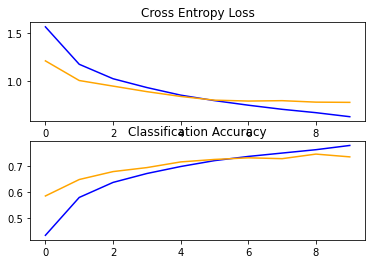

In [17]:
#Define functon to plot loss and accuracy of training and test set
from matplotlib import pyplot
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')


#Plot loss and accuracy of training and test set
summarize_diagnostics(history)


## **Confusion Matrix**

In [0]:
#Change back to numpy array
import numpy as np
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]

In [19]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
confusion_matrix(y_test, y_pred)

array([[784,  16,  38,  26,  21,   2,  16,  16,  53,  28],
       [ 26, 822,   8,  15,   1,   6,  17,   2,  29,  74],
       [ 56,   5, 556,  51, 133,  53, 108,  24,  11,   3],
       [ 21,   7,  52, 535,  65, 158, 121,  27,   9,   5],
       [ 15,   1,  41,  59, 685,  30, 111,  47,   9,   2],
       [  8,   1,  44, 159,  44, 638,  60,  34,   7,   5],
       [  3,   2,  25,  31,  24,  12, 895,   4,   2,   2],
       [ 16,   3,  27,  26,  73,  60,  14, 774,   3,   4],
       [ 52,  30,  25,  15,  10,   6,  19,   2, 821,  20],
       [ 36,  71,   9,  25,   7,   8,  16,  19,  23, 786]])

Here are some comments about the confusion matrix:
- 784 values were correctly classified as "airplane". 
- 822 values were correctly classified as "automobile".
- 556 values were correctly classified as "bird".
- 535 values were correctly classified as "cat".
- 685 values were correctly classified as "deer".
- 638 values were correctly classified as "dog". 
- 895 values were correctly classified as "frog".
- 774 values were correctly classified as "horse".
- 821 values were correctly classified as "ship".
- 786 values were correctly classified as "truck".
- Read down to the "airplane" row, 226 values should have been "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix that were classified as "airplane".
- For the "automobile" row, there are 178 values that should have been  "airplane", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix but they were classified as "automobile".
- 444 values from "bird" row were classified as "bird", but they must have been in "airplane", "automobile", "cat", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- There are 465 values that were classfied as "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "deer", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- 315 values was classified as "deer" in "deer" row, but they must have been "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "cat", "dog", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- 362 values from "dog" row were classified as "dog", but they must have been in "airplane", "automobile", "bird", "cat", "deer", "frog", "horse", "ship", "truck" respectively as the confusion matrix.
- There are 105 values that were classfied as "frog" in "frog" row. They must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "horse", "ship", "truck" respectively as the confusion matrix.
- 226 values was classified as "horse" in "horse" row, but they must have been "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "ship", "truck" respectively as the confusion matrix.
- 179 values was classified as "ship" in "ship" row, but they must have been "cat" in "cat" row. They must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "truck" respectively as the confusion matrix.
- 214 values from "truck" row were classified as "truck", but they must have been in "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship" respectively as the confusion matrix.

## **Correct images**

In [20]:
#Probability to get the 3 incorrect classifications.
X_new = X_test[3:6]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.76, 0.  , 0.03, 0.01, 0.02, 0.  , 0.  , 0.  , 0.18, 0.  ],
       [0.  , 0.  , 0.01, 0.02, 0.01, 0.  , 0.96, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
#Model prediction for X_new
y_pred = model.predict_classes(X_new)
y_pred

array([0, 6, 6])

In [22]:
#Names that the model classified
np.array(class_names)[y_pred]

array(['airplane', 'frog', 'frog'], dtype='<U10')

In [23]:
#Names that classified correctly of test set.
y_new = y_test[3:6]
y_new

[0, 6, 6]

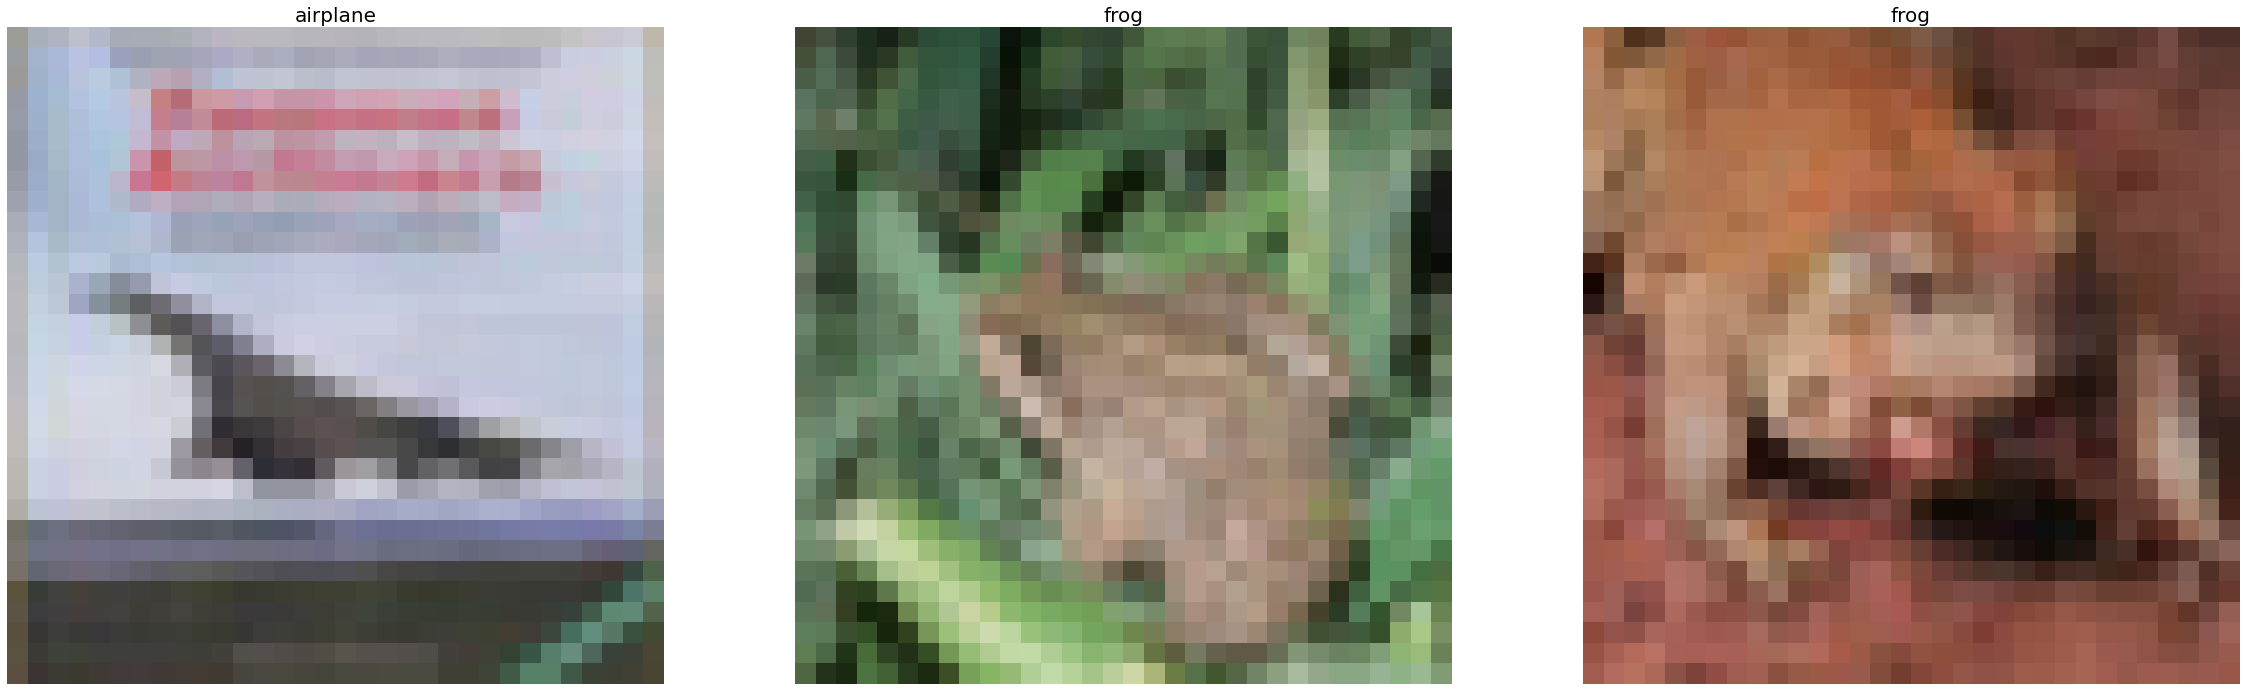

In [24]:
#Plot the pictures that the model classified correctly.
plt.figure(figsize=(40, 20))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The model correctly classified "airline" and "frog" in these pictures

## **Incorrect Images**

In [37]:
#Probability to get the 3 incorrect classifications.
X_new = X_test[20:23]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.09, 0.06, 0.54, 0.06, 0.  , 0.23, 0.01, 0.01],
       [0.49, 0.  , 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.35, 0.  , 0.35, 0.02, 0.14, 0.01, 0.01, 0.01, 0.11, 0.  ]],
      dtype=float32)

In [38]:
#Model prediction for X_new
y_pred = model.predict_classes(X_new)
y_pred

array([4, 2, 0])

In [39]:
#Names that the model classified
np.array(class_names)[y_pred]

array(['deer', 'bird', 'airplane'], dtype='<U10')

In [40]:
#Names that classified correctly of test set.
y_new = y_test[20:23]
y_new

[7, 0, 4]

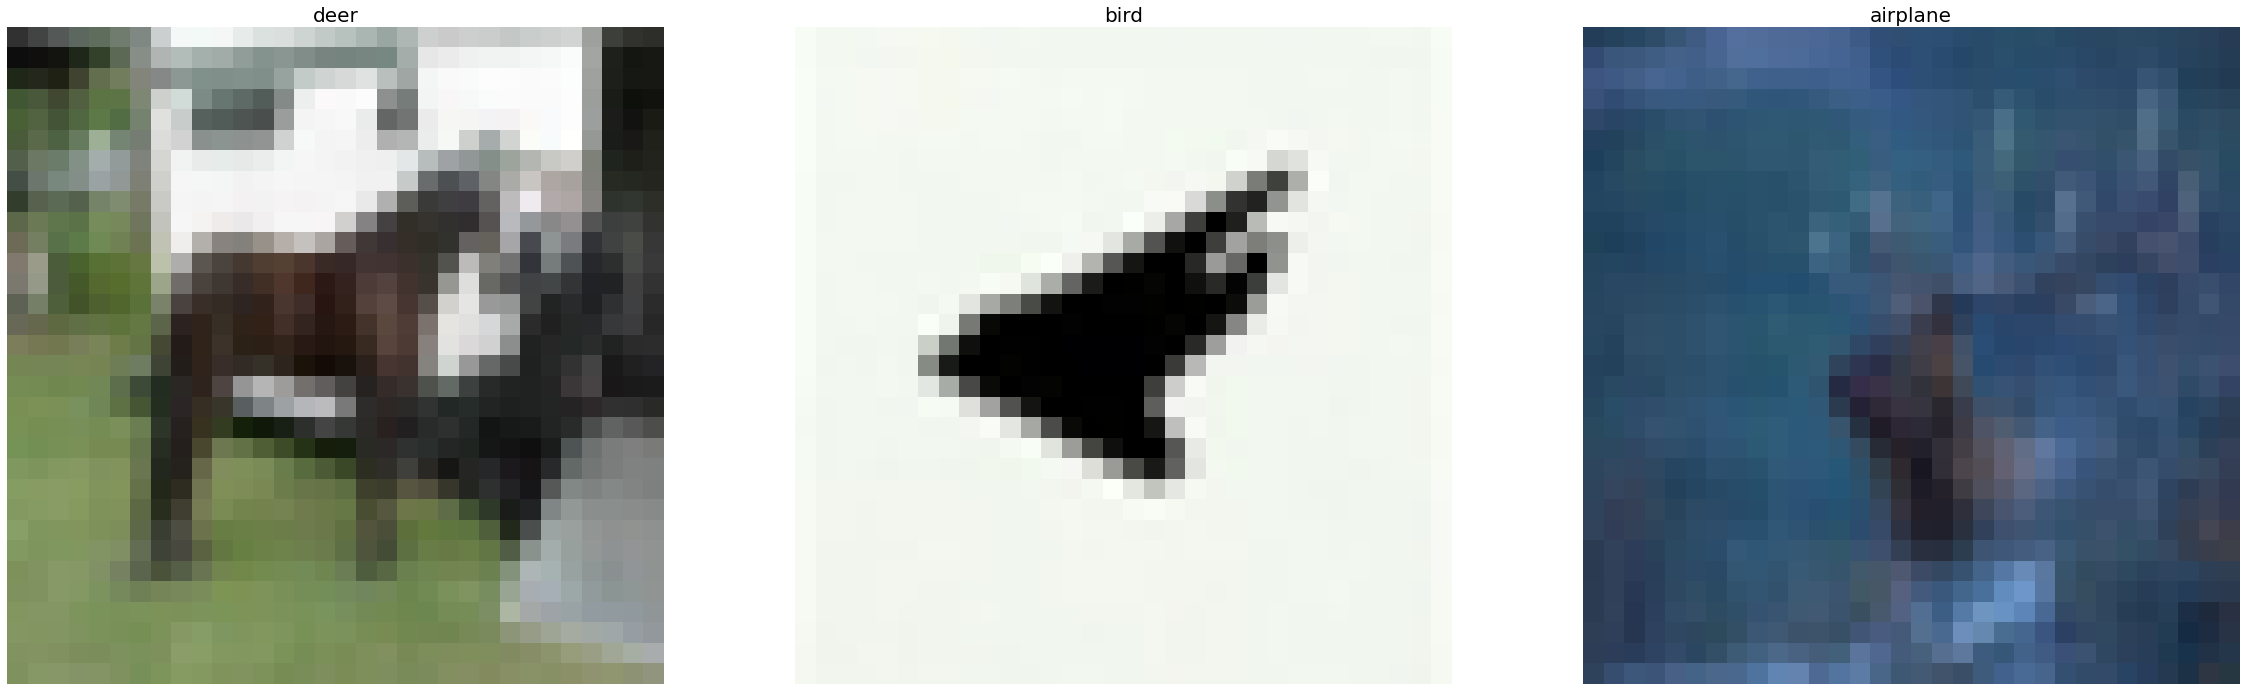

In [41]:
#Plot the pictures that the model classified correctly.
plt.figure(figsize=(40, 20))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The first picture is actually a "dog" but the model classified it as "deer". The second picture is a "airplane" but the model classified as "bird". The third picture is a "deer" but once again the model classified it as "airplane".

# **6. Conclusion**

|                             Multilayer Perceptron                            | Training Accuracy | Validation Accuracy | Testing Accuracy |
|:----------------------------------------------------------------------------:|:-----------------:|---------------------|------------------|
| Baseline                                                                     |       50.64%      |        46.22%       |                  |
| 'he_normal' initalisation                                                    |       50.72%      |        49.20%       |                  |
| VarianceScale with fanavg                                                    |       50.88%      |        47.36%       |                  |
| Power Scheduling                                                             |       50.58%      |        43.76%       |                  |
| Exponential Scheduling                                                       |       49.24%      |        45.54%       |                  |
| Early stop monitor='val_loss', patience=10, verbose=2, min_delta = 0         |       50.58%      |        47.28%       |                  |
| Early Stop monitor='loss', mode='max', min_delta = 1, verbose=1, patience=10 |       50.77%      |        47.04%       |                  |
| Optimal parameter settings                                                   |       51.16%      |        49.44%       |      48.56%      |
|                         Convolutional Neural Networks                        |                   |                     |                  |
| Baseline                                                                     |       67.93%      |        65.66%       |      64.54%      |
| Kernel size = 7                                                              |       68.93%      |        67.34%       |      66.50%      |
| Kernel size = 2                                                              |       66.98%      |        66.48%       |      65.67%      |
| Dropout rate = 0.10                                                          |       63.85%      |        65.82%       |      65.03%      |
| Dropout rate = 0.25                                                          |       56.02%      |        60.44%       |      59.73%      |
| Activation function = sigmoid                                                |       39.90%      |        42.10%       |      40.80%      |
| Activation function = Leaky ReLU                                             |       68.58%      |        64.50%       |      64.67%      |
| Filters = 64 and 128                                                         |       72.11%      |        68.90%       |      68.63%      |
| Filters = 16 and 32                                                          |       62.58%      |        61.66%       |      61.45%      |
| Optimal model                                                                | 78.73%            | 74.30%              | 73.16%           |

For most of cases, all training set, validation set and test set accuracy and loss of Convolutional Neural Networks are always higher than those of Multilayer Perception. Compared with the MLP, the optimal CNN model got 78.73% and 73.16% in training accuracy and test accuracy respectively which are higher than the optimal parameter setting of MLP which got 51.16% and 58.56% for training and test accuracy.